In [97]:
from torchvision import transforms
from torchvision.datasets import EMNIST
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
import seaborn as sns
import pandas as pd

In [89]:
data_dir = os.path.dirname(os.getcwd().replace('\\',
                                               '/')) + '/datasets/downloaded'
dataset = EMNIST(data_dir,
                 train=True,
                 download=True,
                 split='byclass',
        )
test_dataset = EMNIST(data_dir,
                      train=False,
                      download=True,
                      split='byclass',
                      transform=transforms.Compose([ToTensor()]))

In [90]:
dataset.data = dataset.data.reshape(-1,28,28).swapaxes(1,2)

In [91]:
len(dataset), len(test_dataset)

(697932, 116323)

In [25]:
labels = []
for _,j in dataset:
    labels.append(j)

In [26]:
counts = np.bincount(labels)
values = []
for i in range(62):
    if i>= 10 and i <=35:
        values.append(chr(i -10 + 65))
    elif i >=36 and i <= 61:
        values.append(chr(i - 36 + 97))
    else:
        values.append(i)
df = pd.DataFrame({'label':values, 'count': counts })
df.sort_values('count',ascending=False,inplace=True)

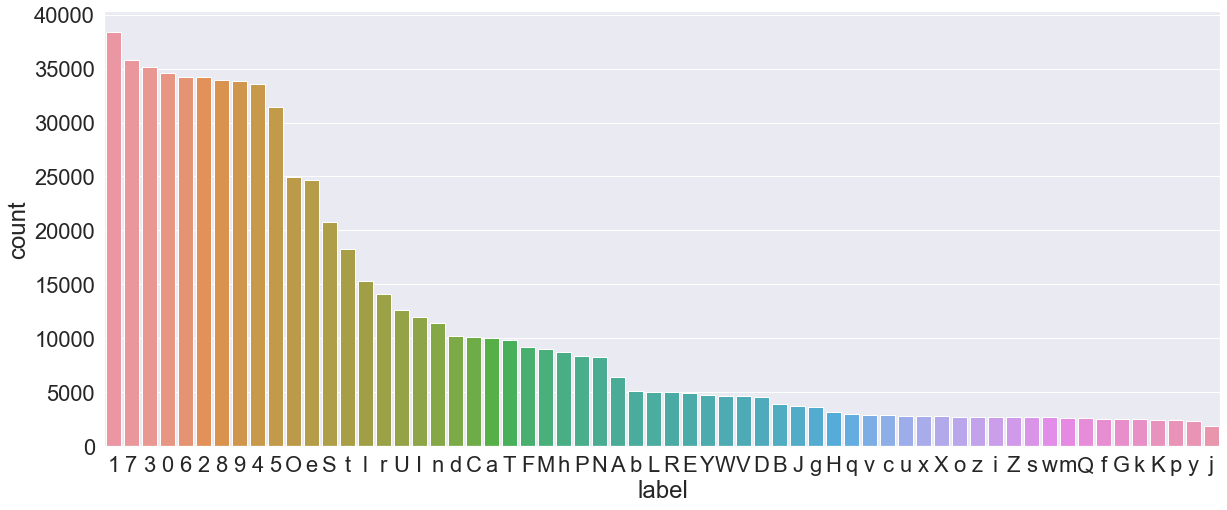

In [27]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=(20, 8))
g = sns.barplot(x='label', y='count',data = df, ax = ax,order = df.label);

In [28]:
uniques = []
values = []
for i,j  in dataset:
    if(len(uniques) == 62):
        break
    if j not in values:
        uniques.append({'img': i, 'label':j})
        values.append(j)

In [33]:
def label_to_value(label):
    if label>= 10 and label <=35:
        label = chr(label -10 + 65)
    elif label >=36 and label <= 61:
        label = chr(label - 36 + 97)
    return label

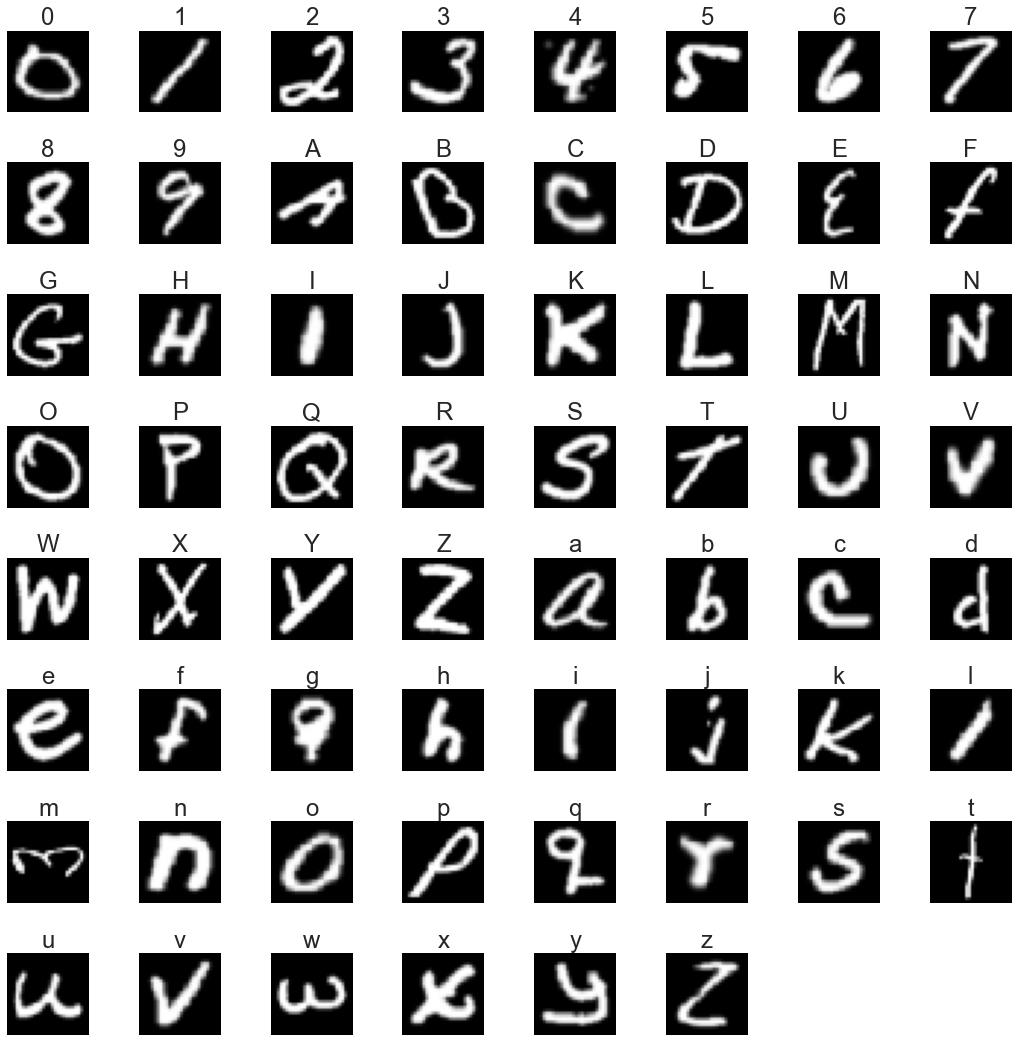

In [69]:
fig = plt.figure(figsize=(15, 15))
for i in values:
    ax = fig.add_subplot(8, 8, i + 1)
    data = list(filter(lambda data: data['label'] ==  i, uniques))
    image = data[0]['img']
    label = data[0]['label']
    label = label_to_value(label)
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')
fig.tight_layout()